# Improving Neural Networks
### 1. Weight Initialization
##### Xavier Initialization: 
Useful for sigmoid and hyperbolic tangent activations, it sets the weights such that the variance of the inputs and outputs is the same.
##### He Initialization: 
Effective for ReLU activation functions, this method sets the weights based on the number of incoming nodes to avoid exploding gradients.
##### Zero Initialization: 
Avoid this, as it can lead to symmetry problems where neurons learn the same features.
### 2. Optimization Algorithms
##### Stochastic Gradient Descent (SGD):
Computes the gradient using only a single or a subset (mini-batch) of data points per iteration.
Variants:
##### SGD with Momentum: 
Adds a fraction of the previous gradient to the current gradient, helping to accelerate convergence.
##### Nesterov Accelerated Gradient (NAG):
Similar to momentum but corrects the direction of the gradient with a look-ahead step.
##### Adam: 
Combines momentum and RMSProp by computing adaptive learning rates for each parameter. It’s widely used due to its efficiency and adaptability.
##### RMSProp:
Keeps an exponentially decaying average of the squared gradients and adjusts the learning rate accordingly.
##### Adagrad:
Adapts learning rates based on the frequency of updates for each parameter.
### 3. Learning Rate Scheduling
##### Step Decay:
Decrease the learning rate by a factor after a fixed number of epochs.
##### Exponential Decay:
Continuously decreases the learning rate exponentially over time.
##### Cyclical Learning Rates (CLR):
Varies the learning rate between a minimum and maximum bound, potentially escaping local minima.
##### Warm Restarts (Cosine Annealing): Periodically increases and decreases the learning rate.
### 4. Regularization Techniques
#### L2 Regularization (Weight Decay):
Adds a penalty proportional to the square of the weights, preventing overfitting by shrinking large weights.
#### L1 Regularization:
Encourages sparsity by penalizing the absolute value of the weights, potentially leading to sparse models.
#### Dropout:
Randomly sets a fraction of the input units to 0 at each update during training to prevent overfitting.
#### Batch Normalization:
Normalizes activations by subtracting the batch mean and dividing by the batch standard deviation, speeding up training and improving generalization.
### 5. Gradient Clipping
Prevents exploding gradients by capping gradients during backpropagation to a maximum threshold, improving stability during training.
### 6. Data Augmentation
Helps improve generalization by artificially increasing the size and diversity of the training dataset through transformations like flipping, rotating, scaling, and cropping images.
### 7. Transfer Learning
Fine-tuning a pre-trained model on a new dataset by reusing layers and weights from models trained on large datasets (e.g., ImageNet) and training the final layers specific to the new task.
### 8. Early Stopping
Stops training when the validation loss starts to increase, avoiding overfitting while also reducing the training time.
### 9. Parameter Tuning
##### Grid Search: Tries different combinations of hyperparameters to find the optimal ones.
##### Random Search: Randomly selects hyperparameter combinations, often more efficient than grid search for high-dimensional spaces.
##### Bayesian Optimization: Uses past evaluation results to predict good hyperparameters and is more efficient than grid and random search.
### 10. Advanced Techniques
##### Distillation: Trains a smaller network (student) to mimic the predictions of a larger, well-trained network (teacher), making the smaller model faster and lighter without significant accuracy loss.
##### Ensemble Methods: Combine predictions from multiple models to improve robustness and accuracy. Techniques include bagging, boosting, and stacking.
##### Neural Architecture Search (NAS): Automates the process of designing neural network architectures, optimizing model performance based on predefined objectives (e.g., accuracy, latency).

### 1. Load and Preprocess Dataset
To implement neural network optimization techniques step by step using the diabetes dataset, we'll break it down into sections, covering key areas like data preprocessing, weight initialization, optimization algorithms, regularization, and early stopping. We’ll use TensorFlow/Keras to implement the neural network

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


In [4]:
from sklearn.datasets import load_diabetes
# Load the dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [5]:
# Get feature names
X_names = diabetes.feature_names

In [6]:
X_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
y_name = 'target'
y_name

'target'

In [8]:
# Normalize the target variable
y = (y - np.mean(y)) / np.std(y)
y

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train.shape

(353, 10)

### 2.Create the Neural Network with All Optimizations
This network includes He initialization, Adam optimizer, Dropout, Batch Normalization, Early Stopping, and Learning Rate Scheduling

In [26]:
def create_optimized_model(learning_rate=0.001, optimizer_type='adam'):
    model = Sequential()

    # Input layer with He initialization
    model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='he_normal', activation='relu'))
    
    # Hidden layer 1 with Batch Normalization and Dropout
    model.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # Hidden layer 2 with Batch Normalization and Dropout
    model.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Output 
    model.add(Dense(1, activation='linear'))

    # Optimizers
    if optimizer_type == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_type == 'sgd':
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9)

    # Compile model with MSE loss and MAE metrics
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


### 3.Callbacks: Early Stopping and Learning Rate Reduction
We’ll use EarlyStopping to prevent overfitting and ReduceLROnPlateau to adjust the learning rate dynamically.

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

### 4.Train the Model with Adam Optimizer

In [28]:
# Create the model
model_adam = create_optimized_model(learning_rate=0.001, optimizer_type='adam')

# Train the model
history_adam = model_adam.fit(X_train, y_train, 
                              validation_data=(X_test, y_test),
                              epochs=100, 
                              batch_size=32, 
                              callbacks=[early_stopping, reduce_lr], 
                              verbose=2)


C:\Users\ASIM\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
12/12 - 5s - 429ms/step - loss: 3.0510 - mae: 1.3848 - val_loss: 1.3434 - val_mae: 0.9483 - learning_rate: 0.0010
Epoch 2/100
12/12 - 0s - 17ms/step - loss: 1.8236 - mae: 1.0704 - val_loss: 0.9175 - val_mae: 0.7824 - learning_rate: 0.0010
Epoch 3/100
12/12 - 0s - 21ms/step - loss: 1.8027 - mae: 1.0319 - val_loss: 0.7012 - val_mae: 0.6859 - learning_rate: 0.0010
Epoch 4/100
12/12 - 0s - 9ms/step - loss: 1.5206 - mae: 0.9903 - val_loss: 0.5922 - val_mae: 0.6299 - learning_rate: 0.0010
Epoch 5/100
12/12 - 0s - 7ms/step - loss: 1.4317 - mae: 0.9423 - val_loss: 0.5532 - val_mae: 0.6024 - learning_rate: 0.0010
Epoch 6/100
12/12 - 0s - 8ms/step - loss: 1.2622 - mae: 0.8748 - val_loss: 0.5332 - val_mae: 0.5892 - learning_rate: 0.0010
Epoch 7/100
12/12 - 0s - 7ms/step - loss: 1.2605 - mae: 0.8958 - val_loss: 0.5237 - val_mae: 0.5900 - learning_rate: 0.0010
Epoch 8/100
12/12 - 0s - 8ms/step - loss: 0.9786 - mae: 0.8027 - val_loss: 0.4984 - val_mae: 0.5707 - learning_rate: 0.0010
Epoc

#### 5.Train model with SGD

In [29]:
# Create the model using SGD optimizer
model_sgd = create_optimized_model(learning_rate=0.01, optimizer_type='sgd')

# Train the model
history_sgd = model_sgd.fit(X_train, y_train, 
                            validation_data=(X_test, y_test), 
                            epochs=100, 
                            batch_size=32, 
                            callbacks=[early_stopping, reduce_lr], 
                            verbose=2)


Epoch 1/100
12/12 - 3s - 260ms/step - loss: 2.1729 - mae: 1.1656 - val_loss: 1.7479 - val_mae: 1.1185 - learning_rate: 0.0100
Epoch 2/100
12/12 - 0s - 35ms/step - loss: 1.3100 - mae: 0.9409 - val_loss: 1.5212 - val_mae: 1.0236 - learning_rate: 0.0100
Epoch 3/100
12/12 - 0s - 8ms/step - loss: 1.1815 - mae: 0.8682 - val_loss: 1.0521 - val_mae: 0.7905 - learning_rate: 0.0100
Epoch 4/100
12/12 - 0s - 8ms/step - loss: 0.8078 - mae: 0.7294 - val_loss: 0.9202 - val_mae: 0.7848 - learning_rate: 0.0100
Epoch 5/100
12/12 - 0s - 7ms/step - loss: 0.7495 - mae: 0.6974 - val_loss: 0.9817 - val_mae: 0.7984 - learning_rate: 0.0100
Epoch 6/100
12/12 - 0s - 8ms/step - loss: 0.6522 - mae: 0.6651 - val_loss: 0.5266 - val_mae: 0.5882 - learning_rate: 0.0100
Epoch 7/100
12/12 - 0s - 7ms/step - loss: 0.6890 - mae: 0.6922 - val_loss: 0.6706 - val_mae: 0.6719 - learning_rate: 0.0100
Epoch 8/100
12/12 - 0s - 7ms/step - loss: 0.6142 - mae: 0.6239 - val_loss: 0.6571 - val_mae: 0.6348 - learning_rate: 0.0100
Epoch

#### 6.Evaluation
Evaluate the Model on the Test Set

In [31]:
# Evaluate Adam model
test_loss_adam, test_mae_adam = model_adam.evaluate(X_test, y_test, verbose=0)
print(f"Adam Optimizer - Test Loss (MSE): {test_loss_adam}, Test MAE: {test_mae_adam}")

# Evaluate SGD model
test_loss_sgd, test_mae_sgd = model_sgd.evaluate(X_test, y_test, verbose=0)
print(f"SGD Optimizer - Test Loss (MSE): {test_loss_sgd}, Test MAE: {test_mae_sgd}")


Adam Optimizer - Test Loss (MSE): 0.4338361620903015, Test MAE: 0.5068910121917725
SGD Optimizer - Test Loss (MSE): 1.7479318380355835, Test MAE: 1.1185039281845093


In [33]:
# Predict using Adam model
y_pred_adam = model_adam.predict(X_test)
print(f"Adam Model : {y_pred_adam}")

# Predict using SGD model
y_pred_sgd = model_sgd.predict(X_test)
print(f"SGD Model - MSE on Test Set: {y_pred_sgd}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Adam Model : [[-0.2541642 ]
 [-0.04456925]
 [ 0.36779633]
 [ 2.2172072 ]
 [-0.49585792]
 [-0.68584126]
 [ 1.4646287 ]
 [ 0.57756597]
 [-0.71563965]
 [-0.62323415]
 [-0.6792414 ]
 [ 0.6263123 ]
 [-0.79275686]
 [ 0.6241912 ]
 [-0.8538894 ]
 [-0.6309136 ]
 [ 1.1662077 ]
 [ 1.609291  ]
 [ 0.48346558]
 [ 0.99181217]
 [ 0.33969206]
 [-0.72513384]
 [-1.4032332 ]
 [ 0.6640119 ]
 [-0.27146956]
 [ 0.11316433]
 [ 0.840177  ]
 [ 0.44822946]
 [-1.2417104 ]
 [-0.59038323]
 [ 0.02700532]
 [-0.13823465]
 [-0.7507097 ]
 [ 0.12268039]
 [-0.04817992]
 [ 0.5820796 ]
 [-0.6747595 ]
 [-0.29147097]
 [ 0.24792948]
 [-1.0301702 ]
 [-1.1106253 ]
 [-0.46940497]
 [ 0.12101519]
 [ 0.32753745]
 [ 0.39204168]
 [-0.8858985 ]
 [-0.5477405 ]
 [-0.4376203 ]
 [-1.1318927 ]
 [ 0.2692018 ]
 [-0.48152503]
 [-0.26974544]
 [-0.31286415]
 [-0.70814604]
 [ 0.3663474 ]
 [-0.23618054]
 [-0.5108552 ]
 [ 0.70832384]
 [-0.34251755]
 [-1.115787  ]
 [ 0.41163155]
 [ 0.5391483 ]
 [-0.25705642]
 [-0

### 7. Plotting Loss and Learning Rate
Plot Loss Curves

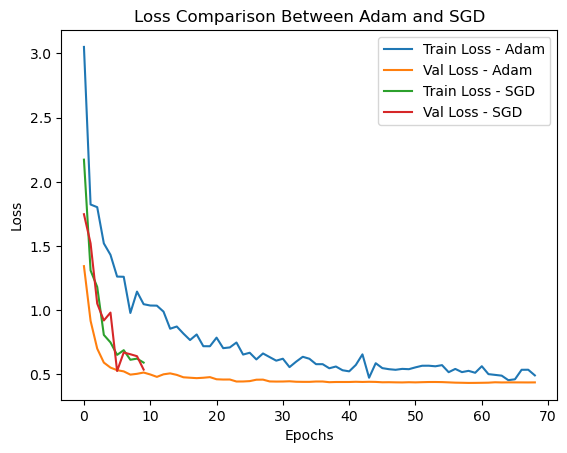

In [34]:
# Plot loss for Adam
plt.plot(history_adam.history['loss'], label='Train Loss - Adam')
plt.plot(history_adam.history['val_loss'], label='Val Loss - Adam')
plt.plot(history_sgd.history['loss'], label='Train Loss - SGD')
plt.plot(history_sgd.history['val_loss'], label='Val Loss - SGD')
plt.title('Loss Comparison Between Adam and SGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Improvement with Regularization

The standard way to avoid overfitting is called **L2 regularization**

The equation for the cost function regularized linear regression is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{1}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$ 


Compare this to the cost function without regularization (which you implemented in  a previous lab), which is of the form:

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 

The difference is the regularization term,  <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 
    
Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice.

Below is an implementation of equations (1) and (2). Note that this uses a *standard pattern for this course*,   a `for loop` over all `m` examples.

In [37]:
from tensorflow.keras import regularizers

def create_l2_regularized_model(learning_rate=0.001, l2_lambda=0.01):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='he_normal',
                    activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))
    model.add(Dense(64, kernel_initializer='he_normal', activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, kernel_initializer='he_normal', activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='linear'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model


In [38]:
# Train the L2 Regularization model
model_l2 = create_l2_regularized_model(learning_rate=0.001, l2_lambda=0.01)
history_l2 = model_l2.fit(X_train, y_train, 
                          validation_data=(X_test, y_test),
                          epochs=100, 
                          batch_size=32, 
                          callbacks=[early_stopping, reduce_lr], 
                          verbose=2)


Epoch 1/100
12/12 - 5s - 447ms/step - loss: 8.5315 - mae: 1.4592 - val_loss: 6.2496 - val_mae: 0.8812 - learning_rate: 0.0010
Epoch 2/100
12/12 - 0s - 7ms/step - loss: 7.2874 - mae: 1.1782 - val_loss: 6.0569 - val_mae: 0.8103 - learning_rate: 0.0010
Epoch 3/100
12/12 - 0s - 7ms/step - loss: 6.8727 - mae: 1.0922 - val_loss: 6.0097 - val_mae: 0.8151 - learning_rate: 0.0010
Epoch 4/100
12/12 - 0s - 9ms/step - loss: 6.6815 - mae: 1.0099 - val_loss: 5.8937 - val_mae: 0.8019 - learning_rate: 0.0010
Epoch 5/100
12/12 - 0s - 6ms/step - loss: 6.4045 - mae: 0.9492 - val_loss: 5.7629 - val_mae: 0.7592 - learning_rate: 0.0010
Epoch 6/100
12/12 - 0s - 6ms/step - loss: 6.3740 - mae: 0.9486 - val_loss: 5.6581 - val_mae: 0.7120 - learning_rate: 0.0010
Epoch 7/100
12/12 - 0s - 6ms/step - loss: 6.1931 - mae: 0.8794 - val_loss: 5.5734 - val_mae: 0.6869 - learning_rate: 0.0010
Epoch 8/100
12/12 - 0s - 6ms/step - loss: 6.2283 - mae: 0.9358 - val_loss: 5.4882 - val_mae: 0.6396 - learning_rate: 0.0010
Epoch 

In [39]:
# Evaluate L2 Regularization model
test_loss_l2, test_mae_l2 = model_l2.evaluate(X_test, y_test, verbose=0)
print(f"L2 Regularization - Test Loss (MSE): {test_loss_l2}, Test MAE: {test_mae_l2}")

L2 Regularization - Test Loss (MSE): 6.249574661254883, Test MAE: 0.8811812400817871


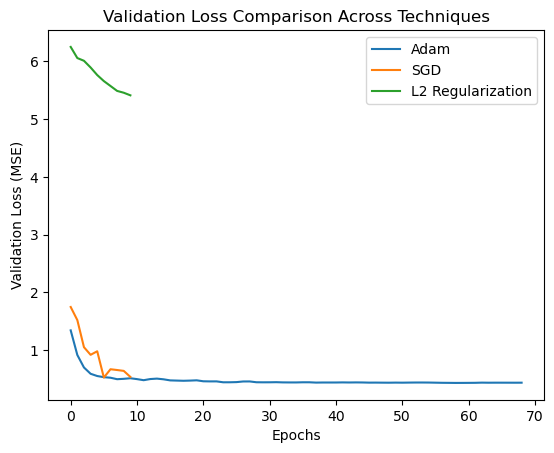

In [40]:
plt.plot(history_adam.history['val_loss'], label='Adam')
plt.plot(history_sgd.history['val_loss'], label='SGD')
#plt.plot(history_rmsprop.history['val_loss'], label='RMSprop')
plt.plot(history_l2.history['val_loss'], label='L2 Regularization')
#plt.plot(history_maxnorm.history['val_loss'], label='Max-Norm Constraint')
plt.title('Validation Loss Comparison Across Techniques')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss (MSE)')
plt.legend()
plt.show()


### Hyperparameter Tuning
Hyperparameter tuning can be accomplished through several methods, such as Grid Search, Random Search, or more advanced techniques like Bayesian Optimization. Here, we'll focus on a 
#### 1.simplified grid search approach to tune hyperparameters

Hyperparameter Tuning Implementation

In [49]:
from sklearn.model_selection import ParameterGrid
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1
from keras.callbacks import EarlyStopping

# Function to create model with hyperparameters
def create_model(regularization_strength=0.0, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(regularization_strength)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))  # For regression output
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Define hyperparameters to tune
param_grid = {
    'regularization_strength': [0.0, 0.01, 0.1, 0.5],
    'dropout_rate': [0.0, 0.2, 0.3, 0.5],
    'batch_size': [16, 32, 64],
    'epochs': [100],
}

# Create parameter combinations
grid = ParameterGrid(param_grid)

best_model = None
best_mae = float('inf')
best_params = {}

# Initialize a list to store results
results_list = []

# Loop over all parameter combinations
for params in grid:
    print(f"Training model with params: {params}")
    model = create_model(params['regularization_strength'], params['dropout_rate'])
    
    # Use early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    
    history = model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test),
                        epochs=params['epochs'], 
                        batch_size=params['batch_size'], 
                        callbacks=[early_stopping],
                        verbose=0)
    
    # Evaluate the model
    val_mae = min(history.history['val_mae'])
    
    # Store results in the list
    results_list.append({
        'Regularization Strength': params['regularization_strength'],
        'Dropout Rate': params['dropout_rate'],
        'Batch Size': params['batch_size'],
        'Mean Test Score (MAE)': val_mae
    })
    
    # Check if this model is the best
    if val_mae < best_mae:
        best_mae = val_mae
        best_model = model
        best_params = params

print(f"Best params: {best_params} with MAE: {best_mae}")



Training model with params: {'batch_size': 16, 'dropout_rate': 0.0, 'epochs': 100, 'regularization_strength': 0.0}
Training model with params: {'batch_size': 16, 'dropout_rate': 0.0, 'epochs': 100, 'regularization_strength': 0.01}
Training model with params: {'batch_size': 16, 'dropout_rate': 0.0, 'epochs': 100, 'regularization_strength': 0.1}
Training model with params: {'batch_size': 16, 'dropout_rate': 0.0, 'epochs': 100, 'regularization_strength': 0.5}
Training model with params: {'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 100, 'regularization_strength': 0.0}
Training model with params: {'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 100, 'regularization_strength': 0.01}
Training model with params: {'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 100, 'regularization_strength': 0.1}
Training model with params: {'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 100, 'regularization_strength': 0.5}
Training model with params: {'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 

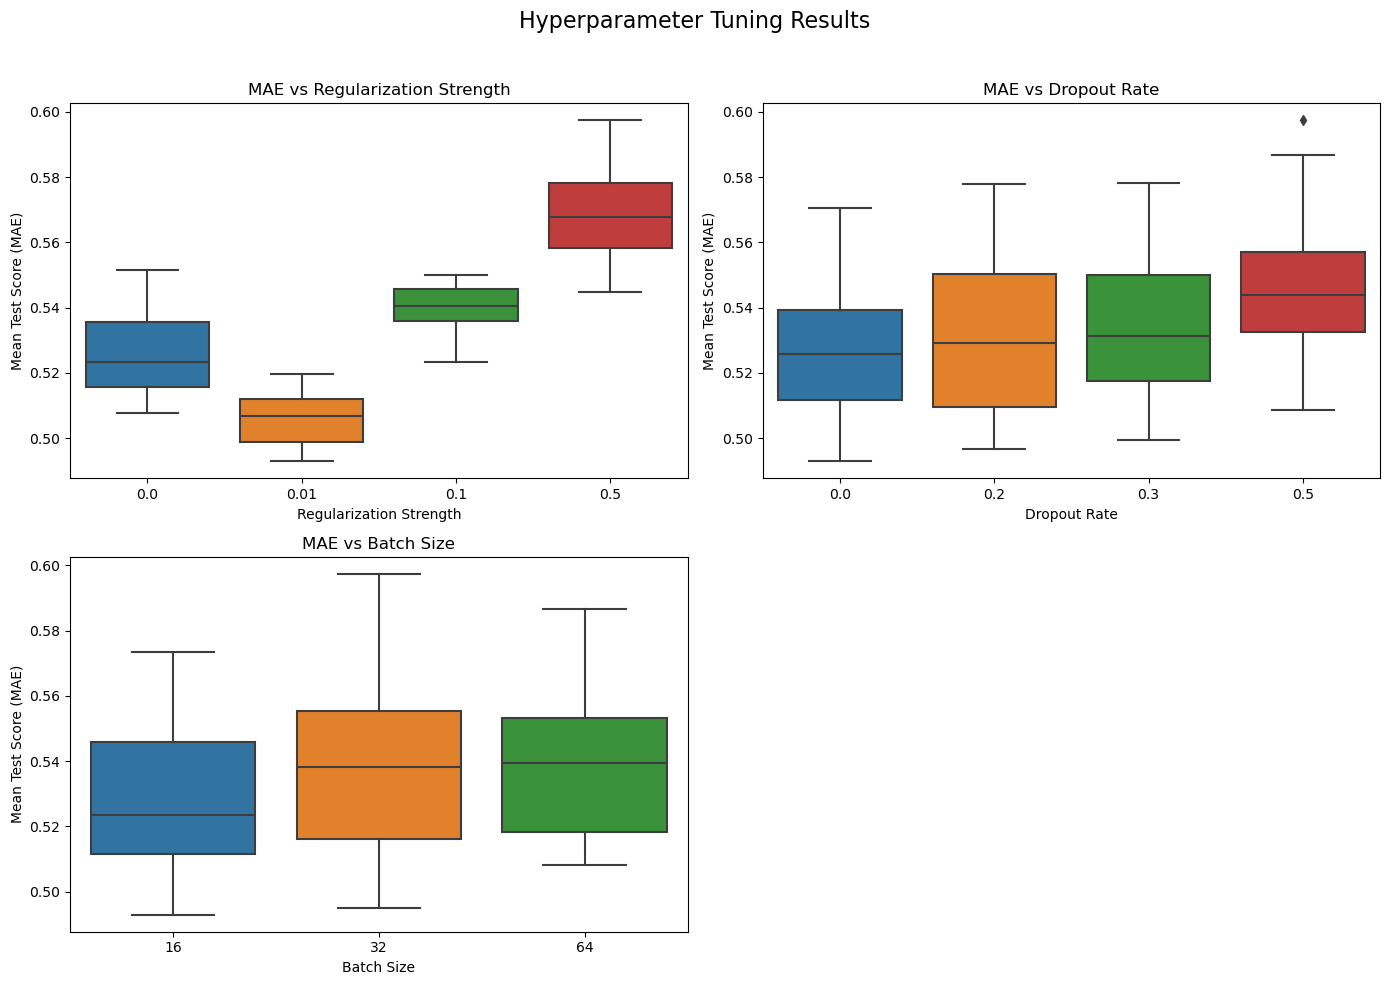

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Convert results to a DataFrame
results_df = pd.DataFrame(results_list)

# Create a grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Hyperparameter Tuning Results', fontsize=16)

# Plot Mean Test Score vs Regularization Strength
sns.boxplot(data=results_df, x='Regularization Strength', y='Mean Test Score (MAE)', ax=axes[0, 0])
axes[0, 0].set_title('MAE vs Regularization Strength')

# Plot Mean Test Score vs Dropout Rate
sns.boxplot(data=results_df, x='Dropout Rate', y='Mean Test Score (MAE)', ax=axes[0, 1])
axes[0, 1].set_title('MAE vs Dropout Rate')

# Plot Mean Test Score vs Batch Size
sns.boxplot(data=results_df, x='Batch Size', y='Mean Test Score (MAE)', ax=axes[1, 0])
axes[1, 0].set_title('MAE vs Batch Size')

# Hide the last subplot as it's not used
axes[1, 1].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Keras Auto Tuner

Keras has an auto-tuning library called Keras Tuner that helps automate the process of hyperparameter tuning, allowing you to find the best set of hyperparameters for your model efficiently. It supports grid search, random search, and a more advanced technique called Bayesian Optimization to find the optimal values for hyperparameters like learning rates, regularization strengths, number of units, and more.

Here’s a simple workflow using Keras Tuner for hyperparameter tuning:

Define a model-building function where the hyperparameters you want to tune are set as arguments.
Configure the tuner (RandomSearch, BayesianOptimization, etc.).
Run the tuning to find the best hyperparameters.
Here’s an example to show how to use Keras Tuner for a Sequential model:

In [54]:
pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [55]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam

# Define the model-building function
def build_model(hp):
    model = Sequential()
    # Tune the number of units in the first dense layer
    units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=units, activation='relu', input_shape=(X_train.shape[1],)))

    # Tune the dropout rate
    dropout_rate = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1, activation='linear'))

    # Tune the learning rate for the optimizer
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='mean_squared_error', 
                  metrics=['mae'])
    
    return model

# Initialize the tuner (RandomSearch or BayesianOptimization)
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=10,  # Number of models to try
    executions_per_trial=1,  # Number of times to repeat each model configuration
    directory='tuner_results',
    project_name='xyz'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, 
             epochs=50, 
             validation_data=(X_test, y_test),
             callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print best hyperparameters
print(f"Best Hyperparameters: {best_hyperparameters.values}")

# Evaluate the best model
loss, mae = best_model.evaluate(X_test, y_test)
print(f"Best Model Test MAE: {mae}")


Trial 10 Complete [00h 00m 05s]
val_mae: 0.5105578899383545

Best val_mae So Far: 0.508630096912384
Total elapsed time: 00h 00m 55s


C:\Users\ASIM\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters: {'units': 256, 'dropout': 0.1, 'learning_rate': 0.00263103928490968}
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4305 - mae: 0.5138  
Best Model Test MAE: 0.508630096912384
